# Разработка персонализированных предложений

**Краткая информация о проекте:**
В проекте проводится прогнозирование покупательской активности пользователей с помощью моделей машинного обучения, а также даются рекомендации по необходимым мероприятиям для стимулирования данной активности.В процессе выполения проекта проводится:

- Знакомство и предобработка данных;
- Исследовательский анализ данных (описание и визуализация);
- Корреляционный анализ (количественных и качественных признаков);
- Обучение и выбор лучшей модели машинного обучения для прогнозирования покупательской активности;
- Анализ важности признаков выбранной лучшей модели машинного обучения;
- Сегментация покупателей с дальнейшим формирование рекомендаций по увеличению покупательской активности.

**План работы:**
1. Провести загрузку данных и знакомство с ними;
2. Провести предобработку данных;
3. Провести исследовательских анализ данных (описание и визуализацию);
4. Провести корреляционный анализ (количественных и качественных признаков);
5. Провести выбор и обучение модели с дальнейшим прогнозированием покупательской активности;
6. Провести анализ важности признаков моделирования по выбранной модели;
7. Провести сегментацию пользователей в зависимости от целевого признака и результатов моделирования;
8. Сформировать рекомендации по увеличению покупательской активности по выделенным сегментам.

**Цель и задачи проекта:**
- **Цель** - сформировать рекомендации по увеличению покупательской активности пользователей.
- **Задачи:**
1. Провести загрузку данных и знакомство с ними;
2. Провести предобработку данных;
- Обработать дубликаты и пропуски;
- Привести наименования столбцов к стандартному виду.
3. Провести исследовательских анализ данных (описание и визуализацию);
- Рассмотреть распределение количественных и качественных признаков полученных датафреймов.
4. Провести корреляционный анализ (количественных и качественных признаков);
- Определить корреляцию между количественными и качественными признаками;
- Построить графики рассеивания по различным признакам;
- Построить графики "ящик с усами" по различным признакам.
5. Провести выбор и обучение модели с дальнейшим прогнозированием покупательской активности;
- Подготовить пайплайн для обучения модели;
- Провести подбор гиперпараметров c помощью специальных функций;
- Определить лучшую модель по выбранной метрики качества.
6. Провести анализ важности признаков моделирования по выбранной модели;
- Оцените важность признаков для выбранной модели;
- Построить график важности с помощью метода SHAP.
7. Провести сегментацию пользователей в зависимости от целевого признака и результатов моделирования;
8. Сформировать рекомендации по увеличению покупательской активности по выделенным сегментам.

In [1]:
!pip install phik -q
!pip install shap -q
!pip install -q -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from scipy import stats as st
from phik.report import correlation_report, plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (OneHotEncoder, LabelEncoder, OrdinalEncoder, 
                                   StandardScaler, RobustScaler)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score)

## Загрузка данных

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Предварительное ознакомление с датафреймом `market_file`

In [4]:
market_file.info()
display(market_file.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_file.columns = ['id', 'activity', 'service', 'agreement', 
                       'market_comm_6_month', 'market_comm_month', 
                       'days_registration', 
                       'promo_purchases_6_month', 'pop_category_6_month', 
                       'quantity_categories_month', 'unpaid_items_3_month',
                       'quantity_fault', 'quantity_pages_3_month']

### Предварительное ознакомление с датафреймом `market_money`

In [6]:
market_money.info()
display(market_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
market_money.columns = ['id', 'period_rev', 'revenue']

### Предварительное ознакомление с датафреймом `market_time`

In [8]:
market_time.info()
display(market_time.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
market_time.columns = ['id', 'period_min', 'min_activity']

### Предварительное ознакомление с датафреймом `money`

In [10]:
money.info()
display(money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [11]:
money.columns = ['id', 'profit']

### Вывод по разделу

- Работать предстоит с четырьмя датасетами размерами **1300х13**, **3900х3**, **2600х3** и **1300х2**;
- Исходя из размерностей датасетов: общее количество уникальных пользователей равно **1300**.

##  Предобработка данных

### Обработка датафрейма `market_file`

In [12]:
def feature_def(dataset):
    numerical_features = dataset.drop(columns='id').select_dtypes(include=['float64', 'int64']).columns
    categorical_features = dataset.drop(columns='id').select_dtypes(include=['object']).columns
    display('Количество явных дубликатов в датафрейме: {}'.format(dataset.duplicated().sum()))
    display('Количество явных дубликатов в столбце id: {}'.format(dataset['id'].duplicated().sum()))
    for column in categorical_features:
        display(column) 
        display(dataset[column].unique())
        
    return [numerical_features, categorical_features]

#### Обработка дубликатов

In [13]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1300 non-null   int64  
 1   activity                   1300 non-null   object 
 2   service                    1300 non-null   object 
 3   agreement                  1300 non-null   object 
 4   market_comm_6_month        1300 non-null   float64
 5   market_comm_month          1300 non-null   int64  
 6   days_registration          1300 non-null   int64  
 7   promo_purchases_6_month    1300 non-null   float64
 8   pop_category_6_month       1300 non-null   object 
 9   quantity_categories_month  1300 non-null   int64  
 10  unpaid_items_3_month       1300 non-null   int64  
 11  quantity_fault             1300 non-null   int64  
 12  quantity_pages_3_month     1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage:

В датафрейме отсутствуют пропуски

In [14]:
features_market_file = feature_def(market_file)

'Количество явных дубликатов в датафрейме: 0'

'Количество явных дубликатов в столбце id: 0'

'activity'

array(['Снизилась', 'Прежний уровень'], dtype=object)

'service'

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

'agreement'

array(['да', 'нет'], dtype=object)

'pop_category_6_month'

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

Обработаем неявный дубликат в столбце `service`

In [15]:
market_file = market_file.replace({'стандартт': 'стандарт', 'Косметика и аксесуары': 'Косметика и аксессуары'})

#### Установление столбца `id` в индекс

In [16]:
market_file = market_file.set_index('id')

### Обратка датафрейма `market_money`

In [17]:
market_money.info()
display(market_money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3900 non-null   int64  
 1   period_rev  3900 non-null   object 
 2   revenue     3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,period_rev,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


В датафрейме отсутствуют пропуски

#### Обработка дубликатов

In [18]:
features_market_money = feature_def(market_money)

'Количество явных дубликатов в датафрейме: 0'

'Количество явных дубликатов в столбце id: 2600'

'period_rev'

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Явные дубликаты в столбце `id` свидетельствуют о наличии возможно заполненных данных за 3 месяцу по каждому клиенту.

#### Установление столбца `id` в индекс

In [19]:
market_money = market_money.set_index('id')

### Обработка датафрейма `market_time`

In [20]:
market_time.info()
display(market_time.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2600 non-null   int64 
 1   period_min    2600 non-null   object
 2   min_activity  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,period_min,min_activity
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


В датафрейме отсутствуют пропуски

#### Обработка дубликатов 

In [21]:
features_market_time = feature_def(market_time)

'Количество явных дубликатов в датафрейме: 0'

'Количество явных дубликатов в столбце id: 1300'

'period_min'

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Явные дубликаты в столбце `id` свидетельствуют о наличии возможно заполненных данных за 2 месяца по каждому клиенту.

In [22]:
market_time = market_time.replace({'предыдцщий_месяц': 'предыдущий_месяц'})

### Обработка датафрейма `money`

In [23]:
money.info()
display(money.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


В датафрейме отсутствуют пропуски

#### Обработка дубликатов 

In [24]:
features_money = feature_def(money)

'Количество явных дубликатов в датафрейме: 0'

'Количество явных дубликатов в столбце id: 0'

### Выводы по разделу

- В процессе предобработки данных был проведен первичный анализ данных, по результатом которых были исключены неявные дубликаты в нужных столбцах;
- Во всех датафреймах отсутствуют пропуски;
- Во всех датафремах значения столбца `id` установлены индексами.

## Исследовательский анализ данных

### Статистический анализ данных

#### Статистический анализ признаков датафрейма `market_file`

In [25]:
display(market_file.head())

,activity,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [26]:
display(market_file['activity'].value_counts())

Прежний уровень    802
Снизилась          498
Name: activity, dtype: int64

Посмотрим статистические данные по количественным столбцам и построим графики boxplot

,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


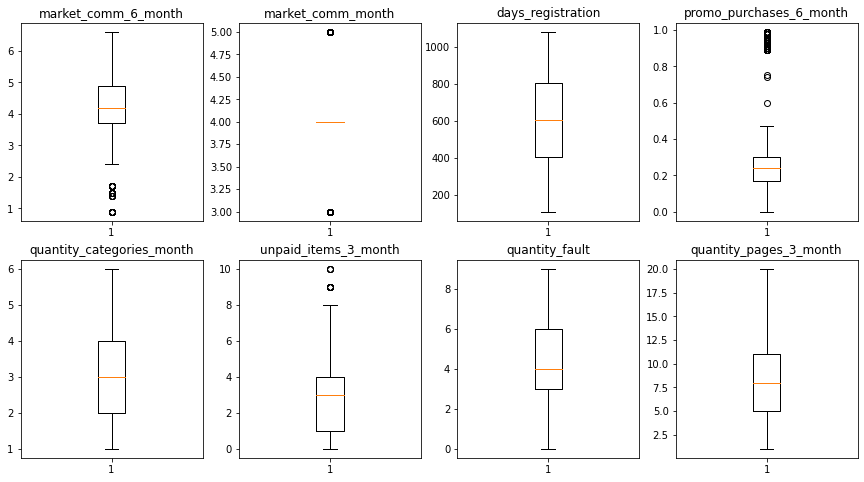

In [27]:
fig, ax = plt.subplots(2, int(len(features_market_file[0]) / 2), figsize=(15, 8))

i, j = 0, 0
display(market_file[features_market_file[0]].describe())
for column in features_market_file[0]:
    ax[i, j].boxplot(market_file[column])
    ax[i, j].set_title(column)
    if j < 3:
        j += 1
    else: 
        i += 1
        j = 0

plt.show()

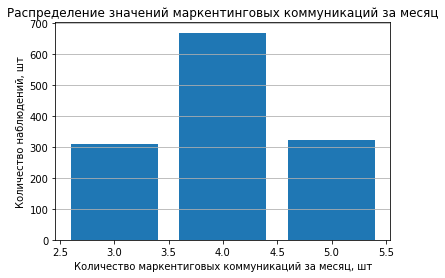

In [28]:
mark = market_file['market_comm_month'].value_counts()
plt.bar(mark.index, mark.values)
plt.title('Распределение значений маркентинговых коммуникаций за месяц')
plt.ylabel('Количество наблюдений, шт')
plt.xlabel('Количество маркентиговых коммуникаций за месяц, шт')
plt.grid(axis='y')
plt.show()

In [29]:
days = market_file.query('market_comm_6_month < 3').reset_index()
display(days['days_registration'])
month = days['days_registration'].apply(lambda x: x // 30)
month = month.rename('month_reg')
display(month.head())
month = month[month < 7]
display(month)

0      607
1      268
2      534
3      488
4      637
      ... 
108    768
109    192
110    932
111    996
112    930
Name: days_registration, Length: 113, dtype: int64

0    20
1     8
2    17
3    16
4    21
Name: month_reg, dtype: int64

19     6
31     6
64     6
68     5
82     6
101    5
109    6
Name: month_reg, dtype: int64

В количественных данных, связанных с **акционными покупками за 6 месяцев**, есть как и нулевые значения, так и выбросы с количеством 6 покупок. Необходимо учитывать это на стадии визуализации. 

Присутствуют также выбросы в `market_comm_6_month` и `unpaid_items_3_month`. 
- Выбросы в столбце `market_comm_6_month` может быть связан с количеством дней регистрации;
- Выбросы в столбце `unpaid_items_3_month` являются признакими пользователя.

#### Статистический анализ признаков датафрейма `market_money`

In [30]:
display(market_money.head())

,period_rev,revenue
id,,
215348,препредыдущий_месяц,0.0
215348,текущий_месяц,3293.1
215348,предыдущий_месяц,0.0
215349,препредыдущий_месяц,4472.0
215349,текущий_месяц,4971.6


Посмотрим статистические данные по количественным столбцам и построим графики boxplot

,revenue
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


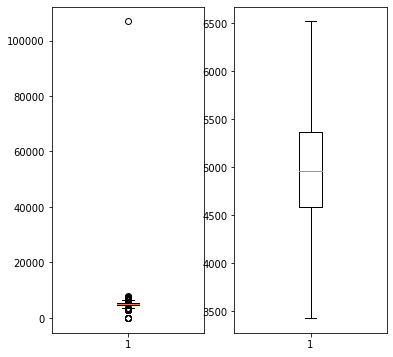

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))

display(market_money[features_market_money[0]].describe())
ax[0].boxplot(market_money['revenue'])
ax[1].boxplot(market_money['revenue'], showfliers=False)

plt.show()

In [32]:
display(market_money.query('revenue > 7500').sort_values(by='revenue', ascending=False))

,period_rev,revenue
id,,
215380,текущий_месяц,106862.2
215493,текущий_месяц,7799.4
215435,текущий_месяц,7605.3
215841,текущий_месяц,7557.0
216144,текущий_месяц,7547.8


In [33]:
display(market_file.loc[market_money.query('revenue > 7500').index])

,activity,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month
id,,,,,,,,,,,,
215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7
215435,Снизилась,премиум,да,4.8,4,875,0.35,Товары для детей,2,2,5,9
215493,Снизилась,стандарт,да,4.0,5,881,0.99,Кухонная посуда,3,5,6,5
215841,Снизилась,стандарт,да,6.3,4,320,0.12,Мелкая бытовая техника и электроника,5,4,4,10
216144,Прежний уровень,стандарт,да,4.8,4,541,0.29,Мелкая бытовая техника и электроника,3,5,5,9


Был обнаружен большой выброс в столбце выручка за текущий месяц. Данное наблюдение будет принято по максимальному значению в данном столбце (7799.4).

In [34]:
market_money = market_money.reset_index()

In [35]:
second = market_money['revenue'].sort_values(ascending=False).iloc[1]
market_money.loc[98, 'revenue'] = second
display(market_money[market_money['id'] == 215380])

,id,period_rev,revenue
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,7799.4


,revenue
count,3900.000000
mean,5000.295333
std,708.329466
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,7799.400000


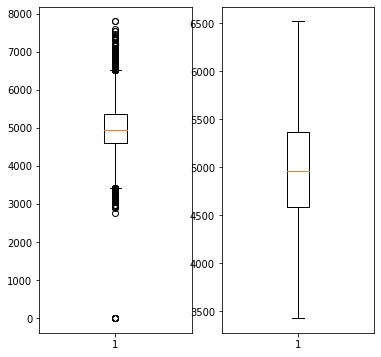

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(6, 6))

display(market_money[features_market_money[0]].describe())
ax[0].boxplot(market_money['revenue'])
ax[1].boxplot(market_money['revenue'], showfliers=False)

plt.show()

#### Статистический анализ признаков датафрейма `market_time`

In [37]:
display(market_time.head())

,id,period_min,min_activity
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


Посмотрим статистические данные по количественным столбцам и построим графики boxplot

,min_activity
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


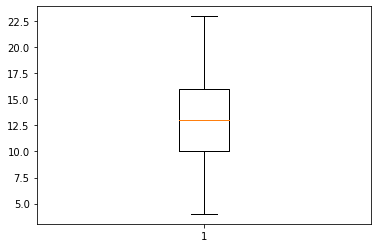

In [38]:
display(market_time[features_market_time[0]].describe())
plt.boxplot(market_time['min_activity'])

plt.show()

Все пользователи в датасете **проявляли экранную активность** в прошлом и текущем месяце

#### Статистический анализ признаков датафрейма `money`

In [39]:
display(money.head())

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


,profit
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


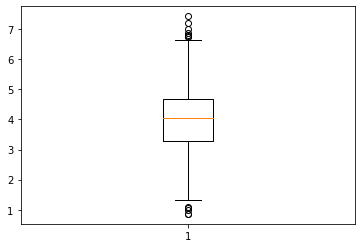

In [40]:
display(money[features_money[0]].describe())
plt.boxplot(money['profit'])

plt.show()

В данных  присутствуют некритические выбросы. Решено оставить их без изменения.

### Отбор покупателей с требуемой покупательской активностью

Откорректируем датафрейм `market_money`

In [41]:
id_drop = set(market_money[market_money['revenue'] == 0]['id'])
id_index = list(market_money[market_money['id'].isin(id_drop)].index)
market_money = market_money.drop(id_index)

Откорректируем датафрейм `market_file`

In [42]:
market_file = market_file.drop(id_drop)

In [43]:
id_index = list(market_time[market_time['id'].isin(id_drop)].index)
market_time = market_time.drop(id_index)

### Визуализация данных

#### Визуализация данных датафрейма `market_file`

**Визуализация количественных значений**

Разделим количественные признаки на непрерывные и дискретные

In [44]:
col_columns = ['market_comm_6_month', 'days_registration', 'promo_purchases_6_month', 
               'quantity_pages_3_month']
col_dis_columns = [x for x in features_market_file[0] if x not in col_columns]

Визуализируем непрерывные количественные признаки с помощью построения гистограмм

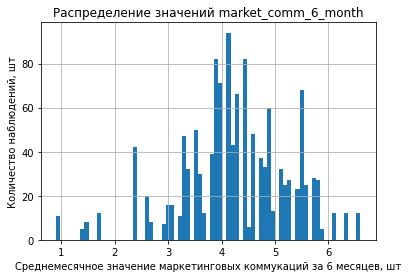

'Распределение market_comm_6_month не относится к нормальному'

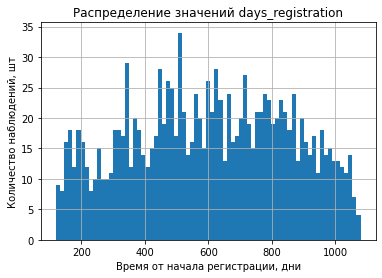

'Распределение days_registration не относится к нормальному'

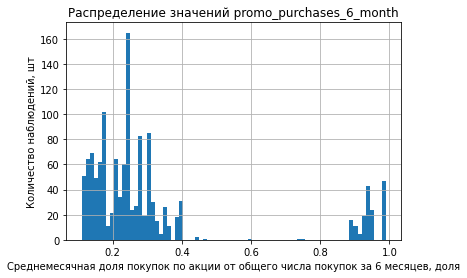

'Распределение promo_purchases_6_month не относится к нормальному'

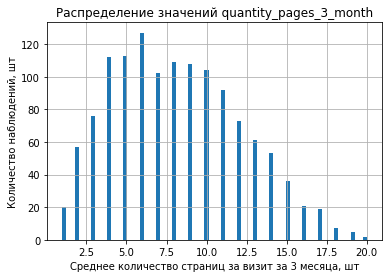

'Распределение quantity_pages_3_month не относится к нормальному'

In [45]:
axes_name = {'market_comm_6_month': ['Среднемесячное значение маркетинговых коммукаций за 6 месяцев', 
                                     ', шт'],
            'days_registration': ['Время от начала регистрации', ', дни'],
            'promo_purchases_6_month': ['Среднемесячная доля покупок по акции от общего числа покупок за 6 месяцев', 
                                       ', доля'],
            'quantity_pages_3_month': ['Среднее количество страниц за визит за 3 месяца', ', шт']}

for i in range(len(col_columns)):
    plt.hist(market_file[col_columns[i]], bins=75)
    plt.title(f'Распределение значений {col_columns[i]}')
    plt.xlabel(axes_name[col_columns[i]][0] + axes_name[col_columns[i]][1])
    plt.ylabel('Количество наблюдений, шт')
    plt.grid()
    plt.show()
    val = st.shapiro(market_file[col_columns[i]]).pvalue
    if val < 0.05:
        display(f'Распределение {col_columns[i]} не относится к нормальному')
    else:
        display(f'Распределение {col_columns[i]} относится к нормальному')

Выводы по графикам **непрерывных количественных признаков**:
- Значения в столбце `market_comm_6_month` имеют вид, приближенный к нормальному распределению;
- Значения в столбце `days_registration` имеют вид, приближенный к нормальному и равномерному распределению;
- Значения в столбце `promo_purchases_6_month` имеют вид, приближенный к бимодальному распределению;
- Значения в столбце `quantity_pages_3_month` имеют вид, приближенный к гамма распределению.

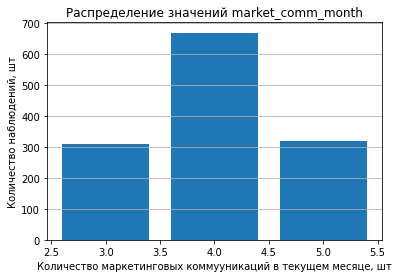

'Распределение market_comm_month не относится к нормальному'

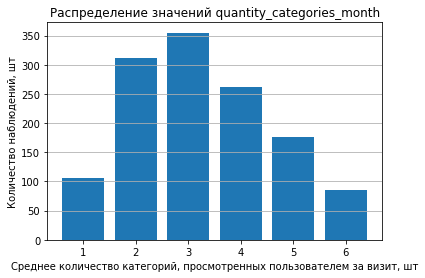

'Распределение quantity_categories_month не относится к нормальному'

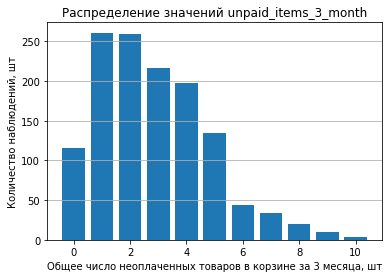

'Распределение unpaid_items_3_month не относится к нормальному'

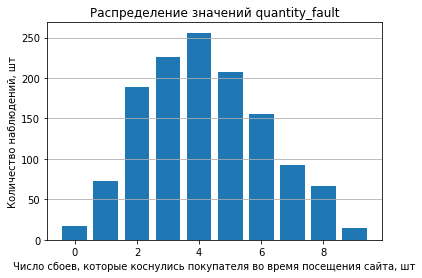

'Распределение quantity_fault не относится к нормальному'

In [46]:
axes_name = {'market_comm_month': ['Количество маркетинговых коммууникаций в текущем месяце', 
                                     ', шт'],
            'quantity_categories_month': ['Среднее количество категорий, просмотренных пользователем за визит',
                                          ', шт'],
            'unpaid_items_3_month': ['Общее число неоплаченных товаров в корзине за 3 месяца', 
                                       ', шт'],
            'quantity_fault': ['Число сбоев, которые коснулись покупателя во время посещения сайта',
                               ', шт']}

for i in range(len(col_dis_columns)):
    table = market_file[col_dis_columns[i]].value_counts()
    plt.bar(table.index, table.values)
    plt.title(f'Распределение значений {col_dis_columns[i]}')
    plt.xlabel(axes_name[col_dis_columns[i]][0] + axes_name[col_dis_columns[i]][1])
    plt.ylabel('Количество наблюдений, шт')
    plt.grid(axis='y')
    plt.show()
    val = st.shapiro(market_file[col_dis_columns[i]]).pvalue
    if val < 0.05:
        display(f'Распределение {col_dis_columns[i]} не относится к нормальному')
    else:
        display(f'Распределение {col_dis_columns[i]} относится к нормальному')

Выводы по графикам **дискретных количественных признаков**:
- Значения в столбце `market_comm_month` имеют вид, приближенный к нормальному распределению;
- Значения в столбце `quantity_categories_month` имеют вид, приближенный к нормальному и равномерному распределению;
- Значения в столбце `unpaid_items_3_month` имеют вид, приближенный к гамма распределению;
- Значения в столбце `quantity_fault` имеют вид, приближенный к нормальному распределению.

**Визуализация качественных значений**

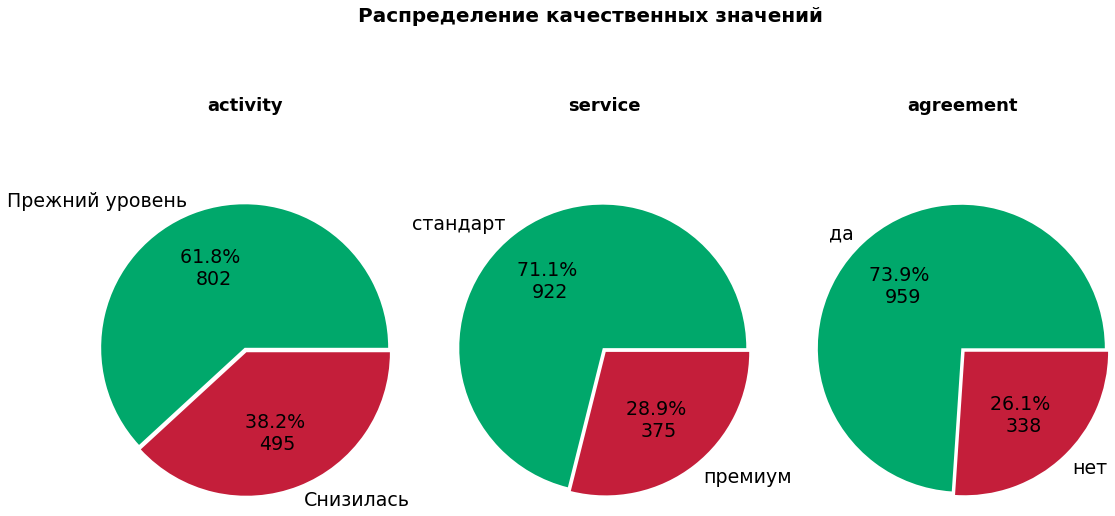

In [47]:
def percent(pct, table):
    absolute = int(round(pct/100 * table.sum()))
    return f"{pct:.1f}% \n{absolute}"

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Распределение качественных значений', size=20, weight='bold')
plt.subplots_adjust(wspace=2)
colors = ['#00A86B', '#C41E3A']
for ind, column in enumerate(features_market_file[1][:-1]):
    table = market_file[column].value_counts()
    wedges, texts, autotexts = ax[ind].pie(table, autopct=lambda pct: percent(pct, table), colors=colors,
                                           radius=3, labels=table.index, explode=[0.05 for i in range(len(table.index))])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    ax[ind].set_title(f'{column}', y=2.5, pad=1, fontsize=18, weight='bold')

plt.show()

Выводы по графикам **качественных признаков**:
- Во входных признаках `service` и `agreement` наблюдается значительный дисбаланс меток (3:1);
- В таргете `activity` также отмечается дисбаланс классов (прежний уровень - 62%, снизилась - 38%). При дальнешйем обучении модели необходимо использовать метрику качества ROC-AUC.

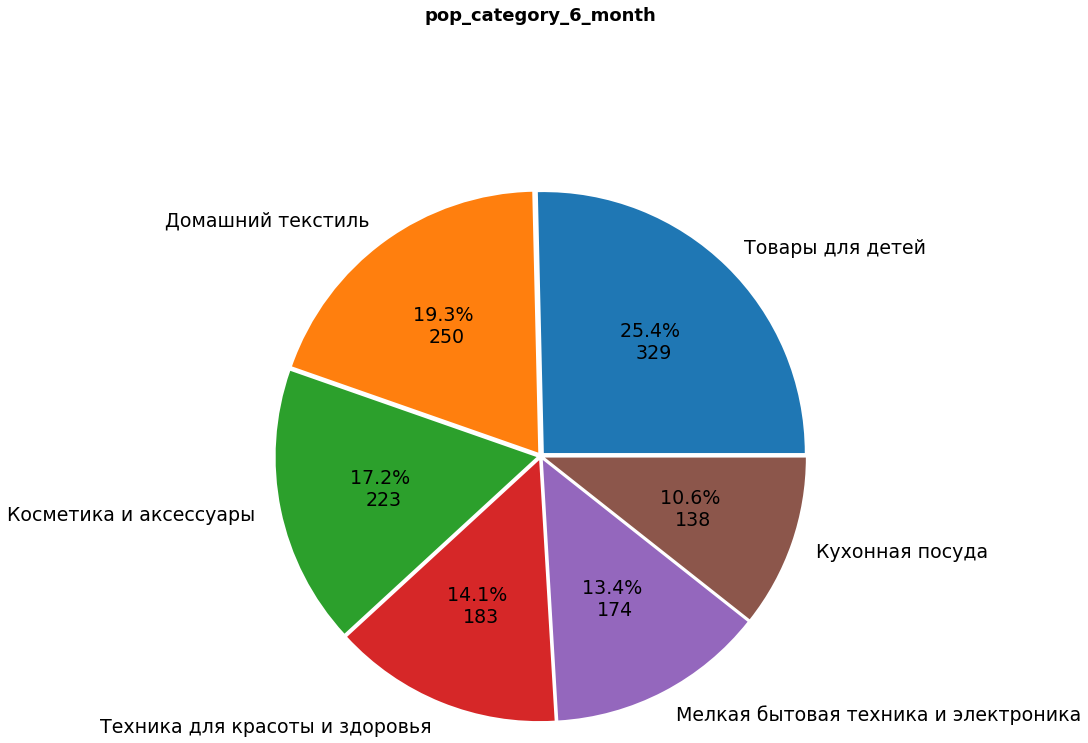

In [48]:
table = market_file['pop_category_6_month'].value_counts()
wedges, texts, autotexts = plt.pie(table, autopct=lambda pct: percent(pct, table), 
                               radius=3, labels=table.index, explode=[0.05 for i in range(len(table.index))])
plt.setp(autotexts, size=19)
plt.setp(texts, size=19)
plt.title('pop_category_6_month', y=2.5, pad=1, fontsize=18, weight='bold')
plt.show()

#### Визуализация данных датафрейма `market_money`

**Визуализация количественных значений**

In [49]:
display(market_money.head())

,id,period_rev,revenue
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


In [50]:
market_money['revenue'].describe()

count    3891.000000
mean     5008.259419
std       680.621620
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.200000
max      7799.400000
Name: revenue, dtype: float64

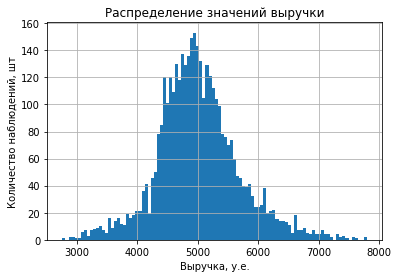

'Распределение revenue не относится к нормальному'

In [51]:
plt.hist(market_money['revenue'], bins=100)
plt.title('Распределение значений выручки')
plt.xlabel('Выручка, у.е.')
plt.ylabel('Количество наблюдений, шт')
plt.grid()
plt.show()
val = st.shapiro(market_money['revenue']).pvalue
if val < 0.05:
    display('Распределение revenue не относится к нормальному')
else:
    display('Распределение revenue относится к нормальному')

period_rev
предыдущий_месяц       6417996.5
препредыдущий_месяц    6272769.0
текущий_месяц          6796371.9
Name: revenue, dtype: float64

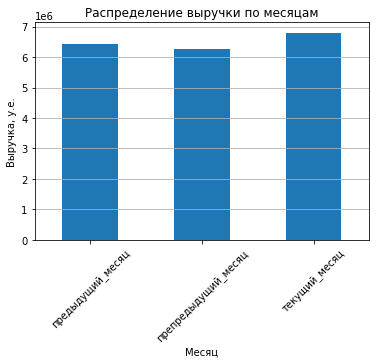

In [52]:
table = market_money.groupby(by='period_rev')['revenue'].sum()
display(table)
table.plot.bar(x=table.index, y=table.values, rot=45)
plt.title('Распределение выручки по месяцам')
plt.ylabel('Выручка, у.е.')
plt.xlabel('Месяц')
plt.grid(axis='y')
plt.show()

Суммарные значения выручки по месяцам лежат в диапозоне **6,2 - 6,8 млн**. Значения выручки имеют вид, приближенный к нормальному распределению.

#### Визуализация данных датафрейма `market_time`

In [53]:
display(market_time.head())

,id,period_min,min_activity
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13


**Визуализация количественных значений**

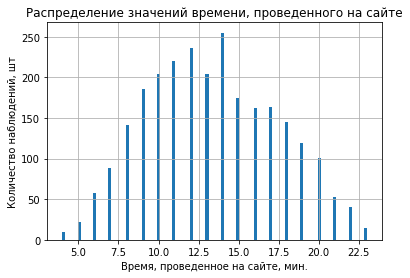

'Распределение min_activity не относится к нормальному'

In [54]:
plt.hist(market_time['min_activity'], bins=100)
plt.title('Распределение значений времени, проведенного на сайте')
plt.xlabel('Время, проведенное на сайте, мин.')
plt.ylabel('Количество наблюдений, шт')
plt.grid()
plt.show()
val = st.shapiro(market_time['min_activity']).pvalue
if val < 0.05:
    display('Распределение min_activity не относится к нормальному')
else:
    display('Распределение min_activity относится к нормальному')

period_min
предыдущий_месяц    17470
текущий_месяц       17135
Name: min_activity, dtype: int64

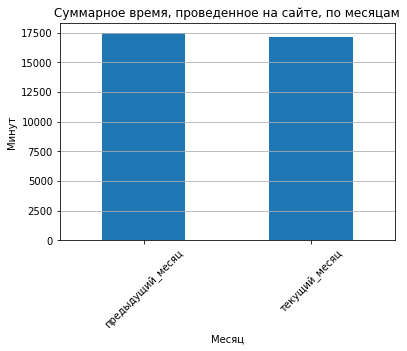

In [55]:
table = market_time.groupby(by='period_min')['min_activity'].sum()
display(table)
table.plot.bar(x=table.index, y=table.values, rot=45)
plt.title('Суммарное время, проведенное на сайте, по месяцам')
plt.ylabel('Минут')
plt.xlabel('Месяц')
plt.grid(axis='y')
plt.show()

Суммарные значения экраной активности по месяцам лежат в диапозоне **17 135 - 17 470 минут**. Значения выручки имеют вид, приближенный к нормальному распределению.

#### Визуализация данных датафрейма `money`

In [56]:
display(money.head())

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Визуализация количественных значений**

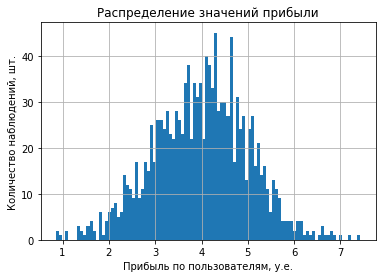

'Распределение profit относится к нормальному'

In [57]:
plt.hist(money['profit'], bins=100)
plt.title('Распределение значений прибыли')
plt.xlabel('Прибыль по пользователям, у.е.')
plt.ylabel('Количество наблюдений, шт.')
plt.grid()
plt.show()
val = st.shapiro(money['profit']).pvalue
if val < 0.05:
    display('Распределение profit не относится к нормальному')
else:
    display('Распределение profit относится к нормальному')

### Вывод по разделу 

- Распределение `market_comm_6_month` имеет неоднородное распределение по пользователям. У некоторых пользавателей с большим сроком регистрации малое значение `market_comm_6_month`. Стоит рассмотреть возможность повышения количество коммуникаций с такими пользователями до средних значений;
- Большая часть значений `unpaid_items_3_month` располагаются от 0 до 5. Однако есть пользователе со значениями этого признака свыше 5 (до 10). Стоит отдельно проанализировать активность данных пользователей и тех товаров, которые они не оплачивают, для возможности формирования персонализированных предложений.
- Значения в столбце `promo_purchases_6_month` имеют вид, приближенный к бимодальному распределению. Первый "крупный пик" находится в диапозоне 0-0,2, второй "малый пик" - в диапозоне 0,9-1. Данное распределение указывают на то, что есть перспективы внедрения более точных персонализированных предложений (сместить "крупный пик" ближе к высоким значениям).
- Суммарные значения выручки по месяцам лежат в диапозоне **6,2 - 6,8 млн**. Значения выручки имеют вид, приближенный к нормальному распределению, **со средним значеним 5 000**.
- Все пользователи в датасете **проявляли экранную активность** в прошлом и текущем месяце. Суммарные значения экраной активности по месяцам лежат в диапозоне **17 135 - 17 470 минут**.

## Объединение таблиц

In [58]:
display(market_file.shape)
display(market_money.shape)
display(market_time.shape)

(1297, 12)

(3891, 3)

(2594, 3)

In [59]:
data = market_file.copy()

In [60]:
market_money['period_rev'] = market_money['period_rev'].replace({'препредыдущий_месяц': 'pre_2_rev', 
                                                                 'предыдущий_месяц': 'pre_1_rev', 
                                                                 'текущий_месяц': 'pre_0_rev'})

In [61]:
market_time['period_min'] = market_time['period_min'].replace({'предыдущий_месяц': 'pre_1_min', 
                                                               'текущий_месяц': 'pre_0_min'})

In [62]:
for period in market_money['period_rev'].unique():
    sett = market_money[market_money['period_rev'] == period].copy()
    sett = sett.drop(columns='period_rev').set_index('id')
    sett.columns = [period]
    data = data.join(sett, how='outer')

In [63]:
for period in market_time['period_min'].unique():
    sett = market_time[market_time['period_min'] == period].copy()
    sett = sett.drop(columns='period_min').set_index('id')
    sett.columns = [period]
    data = data.join(sett, how='outer')

In [64]:
display(data.head())
display(data.shape)

,activity,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month,pre_2_rev,pre_0_rev,pre_1_rev,pre_0_min,pre_1_min
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10


(1297, 17)

## Корреляционный анализ

### Определение корреляции между признаками 

In [65]:
display(data.head())

,activity,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month,pre_2_rev,pre_0_rev,pre_1_rev,pre_0_min,pre_1_min
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10


In [66]:
interval_columns = col_columns.copy()
interval_columns.extend(['pre_2_rev', 'pre_0_rev', 'pre_1_rev', 'pre_0_min', 'pre_1_min'])
display(interval_columns)

['market_comm_6_month',
 'days_registration',
 'promo_purchases_6_month',
 'quantity_pages_3_month',
 'pre_2_rev',
 'pre_0_rev',
 'pre_1_rev',
 'pre_0_min',
 'pre_1_min']

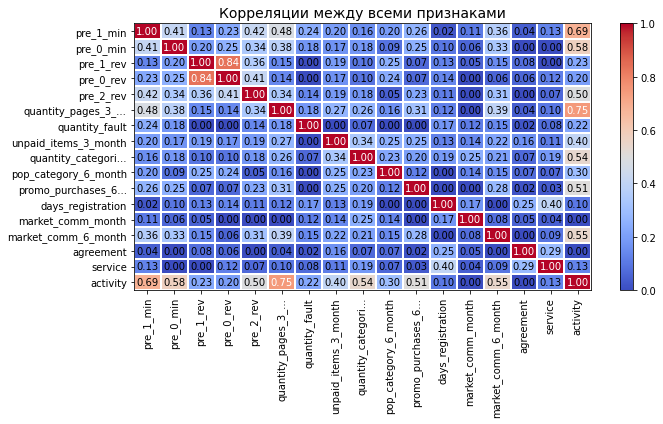

In [67]:
correlation_matrix = data.phik_matrix(interval_cols=interval_columns)

plot_correlation_matrix(correlation_matrix.values, 
                        x_labels=correlation_matrix.columns, 
                        y_labels=correlation_matrix.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title='Корреляции между всеми признаками', 
                        fontsize_factor=1, 
                        figsize=(10, 6))
plt.tight_layout()

В процессе проведения корреляционного анализа была обнаружена **взаимосвязь** следующих признаков (**мультиколлинеарность**):
- Высокая прямая линейная корреляция (0,84) признака `pre_0_rev` и `pre_1_rev`.

Была обнаружена следующая **взаимосвязь** между целевым признаком и входными:
- Высокая прямая линейная корреляция (0,75) целевого признака `activity` и входного признака `quantity_pages_3_month`;
- Заметная прямая линейная корреляция (0,69) целевого признака `activity` и входного признака `pre_1_min`;
- Заметная прямая линейная корреляция (0,58) целевого признака `activity` и входного признака `pre_0_min`;
- Заметная прямая линейная корреляция (0,55) целевого признака `activity` и входного признака `promo_purchases_6_month`.

Для принятия решения по регламенту работу с данными зависимостями необходимо дополнительно провести визулизацию распределений.

### Построение диаграмм рассеивания и графиков "ящик с усами" по признакам

#### Построение диаграмм рассеивания

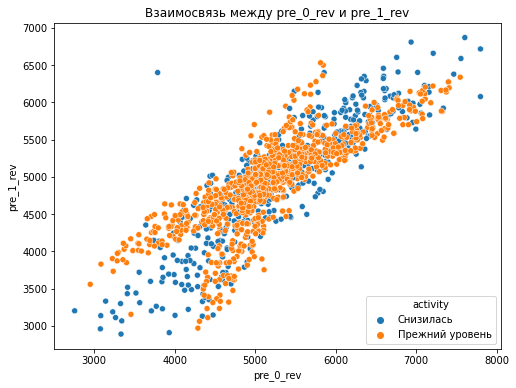

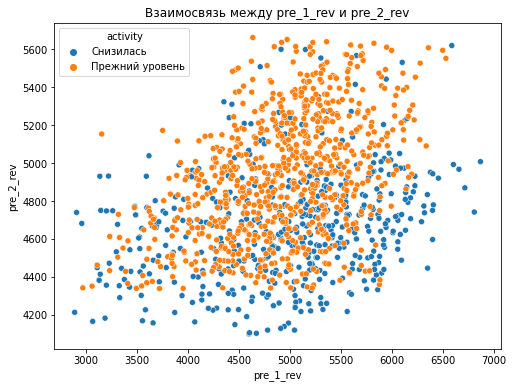

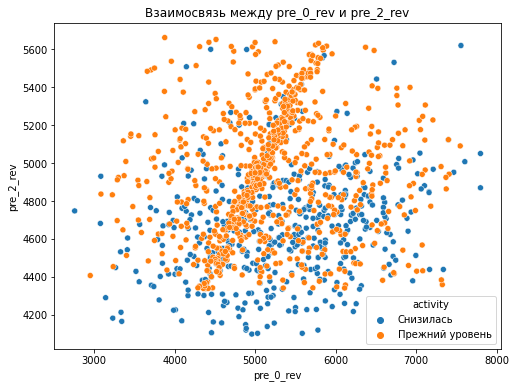

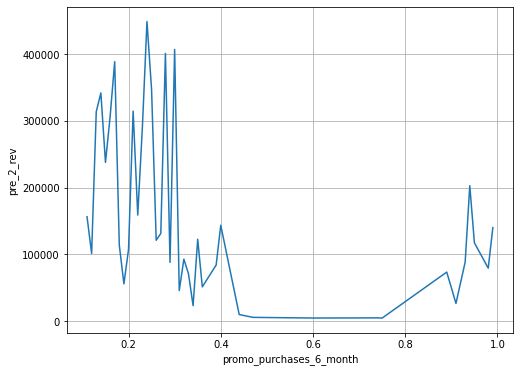

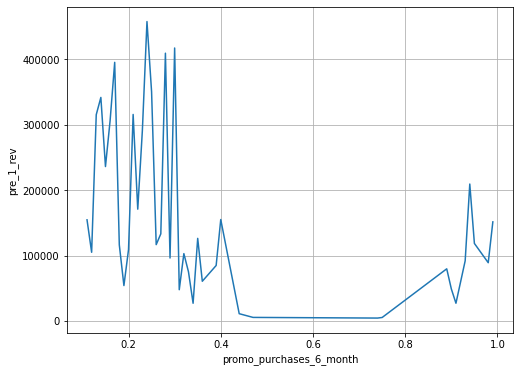

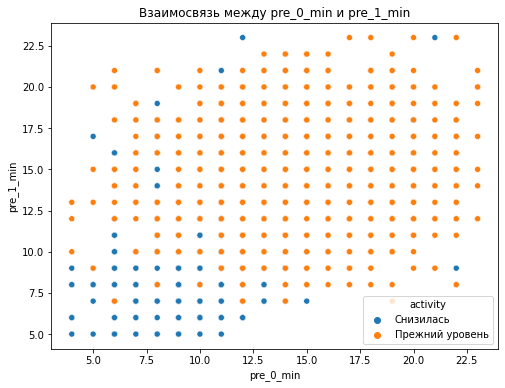

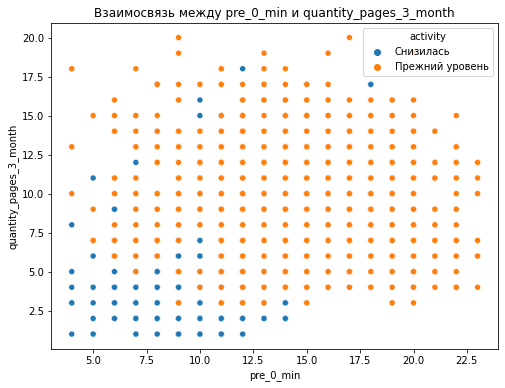

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data[data['pre_1_rev'] > 0], x='pre_0_rev', y='pre_1_rev', 
                hue='activity', alpha=1)
plt.title('Взаимосвязь между pre_0_rev и pre_1_rev')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data[data['pre_1_rev'] > 0], x='pre_1_rev', y='pre_2_rev',
                hue='activity')
plt.title('Взаимосвязь между pre_1_rev и pre_2_rev')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data[data['pre_2_rev'] > 0], x='pre_0_rev', y='pre_2_rev', 
                hue='activity')
plt.title('Взаимосвязь между pre_0_rev и pre_2_rev')
plt.show()

promo = data.groupby(by='promo_purchases_6_month')['pre_2_rev'].sum()
plt.figure(figsize=(8, 6))
plt.plot(promo.index, promo.values)
plt.grid()
plt.xlabel('promo_purchases_6_month')
plt.ylabel('pre_2_rev')
plt.show()

promo = data.groupby(by='promo_purchases_6_month')['pre_1_rev'].sum()
plt.figure(figsize=(8, 6))
plt.plot(promo.index, promo.values)
plt.grid()
plt.xlabel('promo_purchases_6_month')
plt.ylabel('pre_1_rev')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pre_0_min', y='pre_1_min', 
                hue='activity')
plt.title('Взаимосвязь между pre_0_min и pre_1_min')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='pre_0_min', y='quantity_pages_3_month', 
                hue='activity')
plt.title('Взаимосвязь между pre_0_min и quantity_pages_3_month')
plt.show()

#### Построение графиков "ящик с усами"

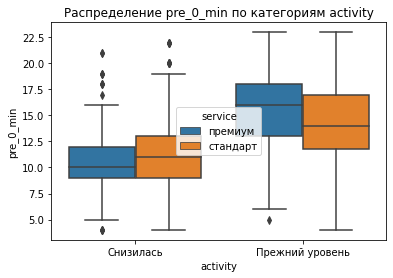

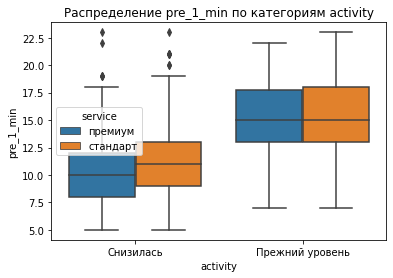

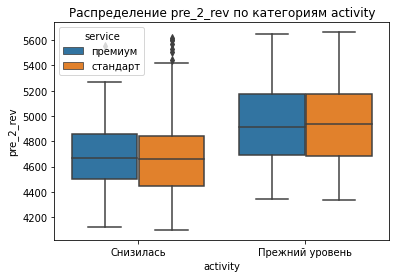

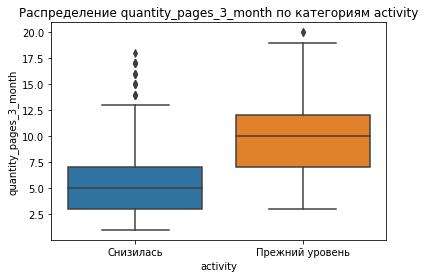

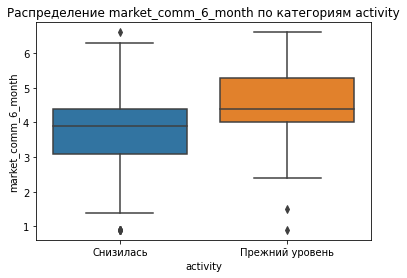

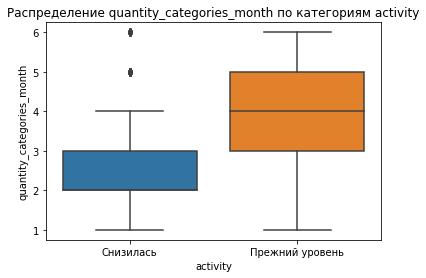

In [69]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='activity', y='pre_0_min', hue='service')
plt.title('Распределение pre_0_min по категориям activity')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='activity', y='pre_1_min', hue='service')
plt.title('Распределение pre_1_min по категориям activity')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data[data['pre_2_rev'] > 0], x='activity', y='pre_2_rev', hue='service')
plt.title('Распределение pre_2_rev по категориям activity')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='activity', y='quantity_pages_3_month')
plt.title('Распределение quantity_pages_3_month по категориям activity')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='activity', y='market_comm_6_month')
plt.title('Распределение market_comm_6_month по категориям activity')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='activity', y='quantity_categories_month')
plt.title('Распределение quantity_categories_month по категориям activity')
plt.show()

### Вывод по разделу

В процессе проведения корреляционного анализа была обнаружена **взаимосвязь** следующих признаков (**мультиколлинеарность**):
- Высокая прямая линейная корреляция (0,84) признака `pre_0_rev` и `pre_1_rev`.

Была обнаружена следующая **взаимосвязь** между целевым признаком и входными:
- Высокая прямая линейная корреляция (0,75) целевого признака `activity` и входного признака `quantity_pages_3_month`;
- Заметная прямая линейная корреляция (0,69) целевого признака `activity` и входного признака `pre_1_min`;
- Заметная прямая линейная корреляция (0,58) целевого признака `activity` и входного признака `pre_0_min`;
- Заметная прямая линейная корреляция (0,55) целевого признака `activity` и входного признака `promo_purchases_6_month`.

## Обучение моделей МО

### Подготовка пайплайна

In [70]:
features_data = [data.select_dtypes(include=['float64', 'int64']).columns, 
                 data.select_dtypes(include=['object']).columns]

In [71]:
RANDOM_STATE = 7
TEST_SIZE = 0.25

ohe_columns = ['agreement', 'pop_category_6_month']
ord_columns = ['service']
num_columns = list(features_data[0])

In [72]:
categories = [list(data['service'].unique())]

ohe_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),  
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))])

ordin_pipe = Pipeline(steps=[
    ('imputer_before', SimpleImputer(strategy='most_frequent', fill_value='unknown')), 
    ('ordin', OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer_after', SimpleImputer(strategy='most_frequent', fill_value='unknown'))])

In [73]:
preprocessor = ColumnTransformer(transformers=[('ohe', ohe_pipe, ohe_columns),
                                               ('ord', ordin_pipe, ord_columns),
                                               ('num', StandardScaler(), num_columns)]) 

In [74]:
pipe_final = Pipeline([('preprocessor', preprocessor), 
                       ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

### Обучение моделей

In [75]:
data_segment = data.copy()
data = data.reset_index(drop=True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['activity'], axis=1),
                                                    data['activity'], test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE, 
                                                    stratify = data['activity'])

In [77]:
display(X_train.head(), y_train.head())
display(X_test.shape, y_test.shape)

,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month,pre_2_rev,pre_0_rev,pre_1_rev,pre_0_min,pre_1_min
580,стандарт,нет,4.9,4,302,0.19,Кухонная посуда,1,5,3,7,5263.0,6143.4,5665.0,9,11
738,стандарт,нет,4.6,4,561,0.20,Товары для детей,4,3,1,14,4953.0,5986.9,5437.0,6,7
140,стандарт,да,1.7,4,298,0.39,Домашний текстиль,6,3,6,4,4705.0,4521.4,4576.0,11,11
739,стандарт,нет,5.5,4,793,0.27,Косметика и аксессуары,3,0,3,7,5320.0,5522.8,5359.0,18,10
743,стандарт,нет,6.3,5,215,0.24,Техника для красоты и здоровья,5,1,2,8,4590.0,4563.5,3413.0,14,12


580          Снизилась
738    Прежний уровень
140          Снизилась
739    Прежний уровень
743    Прежний уровень
Name: activity, dtype: object

(325, 16)

(325,)

In [78]:
param_grid = [{'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)], 
               'models__max_depth': range(2, 5), 
               'models__max_features': range(2, 5), 
               'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']},
              {'models': [KNeighborsClassifier()],
               'models__n_neighbors': range(2, 5),
               'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']},
              {'models': [LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')],
               'models__C': [0.1, 0.5, 1, 10, 100],
               'models__penalty': ['l1', 'l2'],
               'models__solver': ['saga', 'liblinear'],
               'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']}, 
              {'models': [SVC(random_state=RANDOM_STATE,probability=True)], 
               'models__C': [0.1, 0.5, 1, 10, 100],
               'models__kernel': ['linear', 'poly'],
               'preprocessor__num': [StandardScaler(), RobustScaler(), 'passthrough']}]

In [79]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['agreement',
                                                   'pop_category_6_month']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer_before',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_...
                                                                                 strategy='most_frequent'))]),
                                                  ['service']),
                                                 ('num', StandardScaler(),
                                                  ['market_comm_6_month',
                                                   'market_comm_month',
                                                   'days_registration',
                                                   'promo_purchases_6_month',
                                                   'quantity_categories_month',
                                                   'unpaid_items_3_month',
                                                   'quantity_fault',
                                                   'quantity_pages_3_month',
                                                   'pre_2_rev', 'pre_0_rev',
                                                   'pre_1_rev', 'pre_0_min',
                                                   'pre_1_min'])])),
                ('models', DecisionTreeClassifier(random_state=7))])

In [80]:
randomized_search = RandomizedSearchCV(pipe_final, param_grid, n_iter=10, cv=5, scoring='roc_auc', 
                                       random_state=RANDOM_STATE, n_jobs=-1, error_score='raise')

In [81]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['agreement',
                                                                                'pop_category_6_month']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('imputer_befo...
                                         'models__penalty': ['l1', 'l2'],
                                         'models__solver': ['saga',
                                                            'liblinear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=7)],
                                         'models__C': [0.1, 0.5, 1, 10, 100],
                                         'models__kernel': ['linear', 'poly'],
                                         'preprocessor__num': [StandardScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=7, scoring='roc_auc')

In [82]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['agreement',
                                                   'pop_category_6_month']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer_before',
                           

In [83]:
display(randomized_search.best_params_)

{'preprocessor__num': StandardScaler(),
 'models__kernel': 'poly',
 'models__C': 1,
 'models': SVC(probability=True, random_state=7)}

### Выбор лучшей модели

На основании принятой метрики качества (`roc-auc`=0,90) лучшая модель была принята `SVC(C=1, kernel='poly')` с обработкой количественных признаков с помощью `StandarScaler` и качественных признаков с помощью `OneHotEncoder` и `OrdinalEncoder`.

In [84]:
y_pred = randomized_search.best_estimator_.predict_proba(X_test)[:, 1]
display(roc_auc_score(y_test, y_pred))

0.9077595891510191

## Анализ важности признаков

### Оценка важности и визуализация

In [85]:
preprocessor_best = ColumnTransformer(transformers=[('ohe', ohe_pipe, ohe_columns), 
                                                    ('ord', ordin_pipe, ord_columns), 
                                                    ('num', StandardScaler(), num_columns)]) 

best_pipe = Pipeline([('preprocessor', preprocessor_best), 
                       ('models', SVC(kernel='poly', probability=True, random_state=RANDOM_STATE))])

In [86]:
best_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['agreement',
                                                   'pop_category_6_month']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer_before',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_...
                                                                                 strategy='most_frequent'))]),
                                                  ['service']),
                                                 ('num', StandardScaler(),
                                                  ['market_comm_6_month',
                                                   'market_comm_month',
                                                   'days_registration',
                                                   'promo_purchases_6_month',
                                                   'quantity_categories_month',
                                                   'unpaid_items_3_month',
                                                   'quantity_fault',
                                                   'quantity_pages_3_month',
                                                   'pre_2_rev', 'pre_0_rev',
                                                   'pre_1_rev', 'pre_0_min',
                                                   'pre_1_min'])])),
                ('models',
                 SVC(kernel='poly', probability=True, random_state=7))])

In [87]:
X_train_trans = pd.DataFrame(best_pipe.named_steps['preprocessor'].fit_transform(X_train), 
                            columns=best_pipe.named_steps['preprocessor'].get_feature_names_out())

model_svc = SVC(kernel='poly', probability=True, random_state=RANDOM_STATE)
model_svc.fit(X_train_trans, y_train)

SVC(kernel='poly', probability=True, random_state=7)

In [88]:
explainer = shap.Explainer(model_svc.predict_proba, X_train_trans)

In [89]:
cols = X_train_trans.columns
explainer.feature_names = list(cols)

In [90]:
X_test_trans = pd.DataFrame(best_pipe.named_steps['preprocessor'].transform(X_test), 
                            columns=best_pipe.named_steps['preprocessor'].get_feature_names_out())

In [91]:
shap_values = explainer(X_test_trans)

PermutationExplainer explainer: 326it [02:22,  2.18it/s]                         


/tmp/ipykernel_168/2213343995.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values.values[:, :, 0], X_test_trans, plot_type="dot", plot_size=(15, 6))


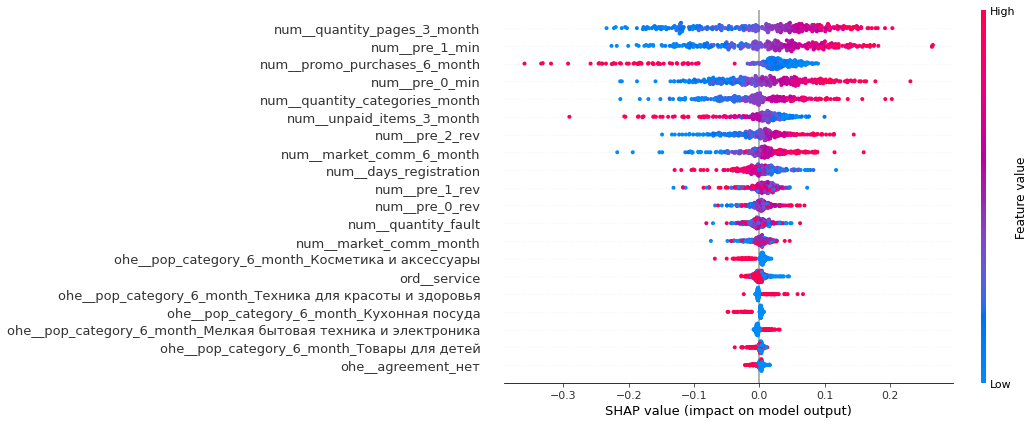

In [92]:
shap.summary_plot(shap_values.values[:, :, 0], X_test_trans, plot_type="dot", plot_size=(15, 6))

### Выводы по разделу

Максимальный вклад в определение таргета вносят следующие признаки (**топ 6**):
1. Среднее количество страниц, которые посмотрел покупатель за один визит на сайт за последние 3 месяца (прямая зависимость);
2. Время, проведенное на сайте в минутах за предыдущий месяц(прямая зависимость);
3. Время, проведенное на сайте в минутах за текущий месяц (прямая зависимость);
4. Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев (обратная зависимость);
5. Среднее количество категорий, просмотренных за визит в течение последнего месяца (прямая зависимость);
6. Общее число неоплаченных товаров в корзине за последние 3 месяца.

Стоит отметить, что вид популярной категории товаров у покупателей также влияет на целевой признак. Только при значении **категории товара** у покупателя "Техника для красоты и здоровья" и "Бытовая техника и электроника" **вероятность** целевого значения "Прежний уровень" **повышается**.

## Сегментация покупателей

Для разработки рекомендаций по увеличению покупательской активности проведем поэтапную сегментацию пользователей.

### Определение сегментов покупателей

Объединяем данные со значениями прибыльности

In [93]:
money = money.set_index('id')
data_segment = data_segment.join(money)

**Первый этап**: разделяем пользователей по покупательской активности. Особое внимание уделим пользователям, у которых активность снизилась.

In [94]:
segment_0 = data_segment[data_segment['activity'] == 'Снизилась']
segment_1 = data_segment[data_segment['activity'] == 'Прежний уровень']

Выделим признаки, которые больше всего влияют на покупательскую активность (на основании моделирования)

In [95]:
features_segment_num = ['quantity_pages_3_month', 'pre_0_min', 'pre_1_min',
                       'promo_purchases_6_month', 'quantity_categories_month', 
                       'unpaid_items_3_month', 'profit']

In [96]:
data_segment = data_segment.reset_index(drop=True)

In [97]:
display(data_segment.head())

,activity,service,agreement,market_comm_6_month,market_comm_month,days_registration,promo_purchases_6_month,pop_category_6_month,quantity_categories_month,unpaid_items_3_month,quantity_fault,quantity_pages_3_month,pre_2_rev,pre_0_rev,pre_1_rev,pre_0_min,pre_1_min,profit
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,5216.0,10,12,4.16
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8,3.13
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,6158.0,13,11,4.87
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,5807.5,11,8,4.21
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10,3.95


Визуализируем распроделение количественных признаков по группам покупательской активности

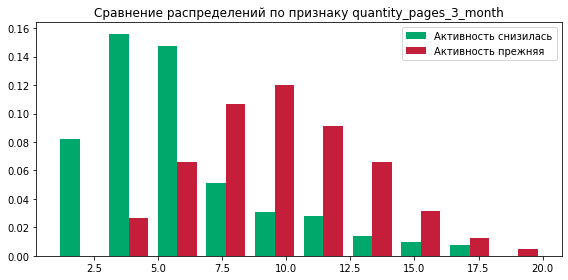

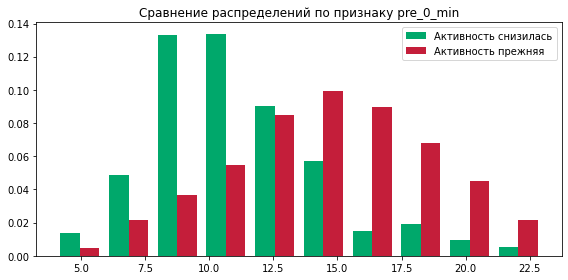

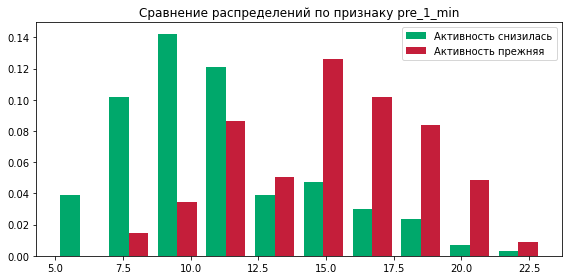

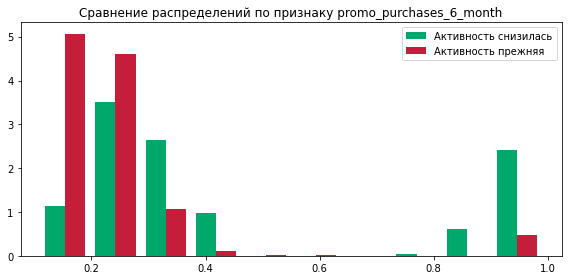

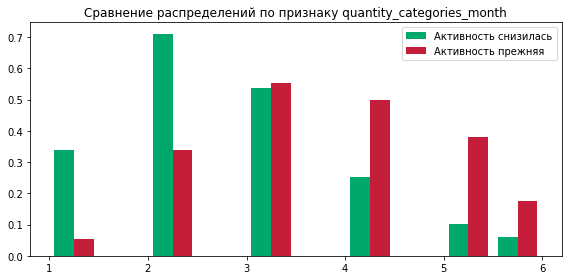

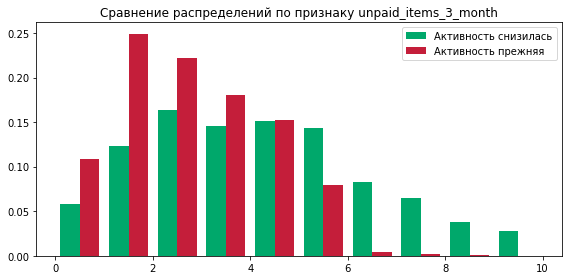

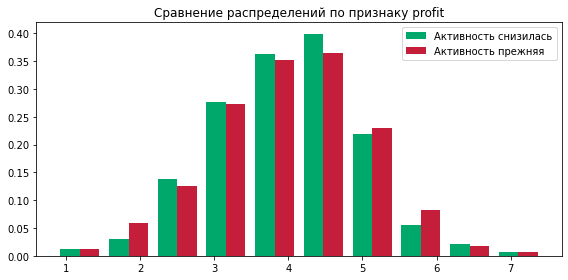

In [98]:
colors = ['#00A86B', '#C41E3A']

for column in features_segment_num:
    fig, ax = plt.subplots(figsize=(8, 4))
    
    ax.hist([segment_0[column], segment_1[column]], density=True, histtype='bar', color=colors, 
            label=['Активность снизилась', 'Активность прежняя'])
    ax.legend(prop={'size': 10})
    ax.set_title(f'Сравнение распределений по признаку {column}')
    
    fig.tight_layout()
    plt.show()

**Выводы по графикам**:
1. Среднее значение количества страниц, которые посмотрел покупатель за один визит на сайт за последние 3 месяца, у покупателей с прежней активностью выше по сравнениею с покупателями, у которых активность снизилась;
2. Среднее значение времени, проведенного на сайте в минутах за текущий месяц, у покупателей с прежней активностью выше по сравнениею с покупателями, у которых активность снизилась;
3. Среднее значение времени, проведенного на сайте в минутах за предыдущий месяц, у покупателей с прежней активностью выше по сравнениею с покупателями, у которых активность снизилась;
4. Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев, у покупателей с прежней активностью ниже по сравнениею с покупателями, у которых активность снизилась;
5. Среднее количество категорий, просмотренных за визит в течение последнего месяца, у покупателей с прежней активностью выше по сравнениею с покупателями, у которых активность снизилась;
6. Общее число неоплаченных товаров в корзине за последние 3 месяца у покупателей с прежней активностью ниже по сравнениею с покупателями, у которых активность снизилась;
7. Прибыль от покупателей, у которых активность снизилась, такая же как от покупателей, у которых активность осталась прежней.

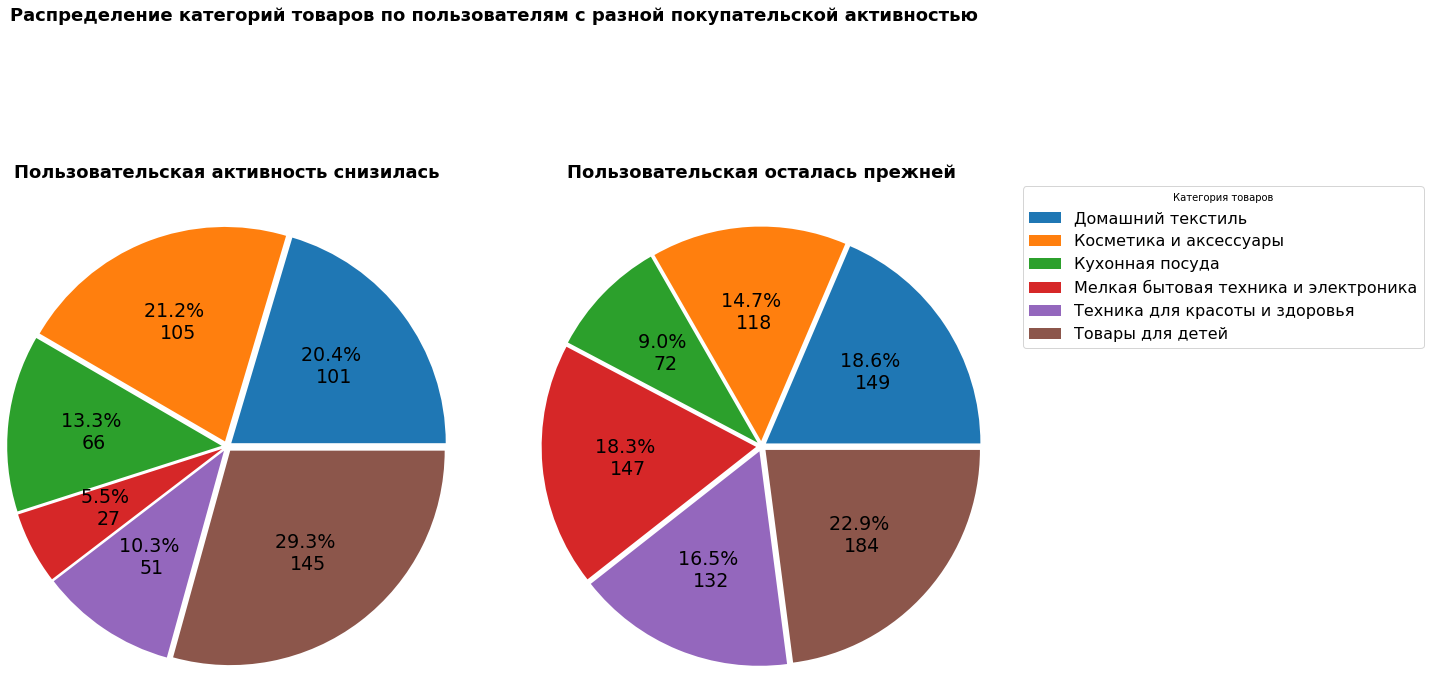

In [204]:
table = [segment_0['pop_category_6_month'].value_counts().sort_index(), 
         segment_1['pop_category_6_month'].value_counts().sort_index()]

fig, ax = plt.subplots(1, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Распределение категорий товаров по пользователям с разной покупательской активностью', size=18, weight='bold')

for i in range(2):
    wedges, texts, autotexts = ax[i].pie(table[i], autopct=lambda pct: percent(pct, table[i]), 
                                         radius=2, explode=[0.05 for i in range(len(table[i].index))])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    plt.tight_layout()
    
    if i == 0:
        ax[i].set_title('Пользовательская активность снизилась', y=1.5, pad=1, fontsize=18, weight='bold')
    else:
        ax[i].set_title('Пользовательская осталась прежней', y=1.5, pad=1, fontsize=18, weight='bold')
        
plt.legend(wedges, table[0].index, fontsize=16, title='Категория товаров', bbox_to_anchor=(3, 0.5, 0, 1))

plt.show()

In [206]:
categories = pd.DataFrame(segment_0['pop_category_6_month'].value_counts().sort_index())
categories['activ'] = segment_1['pop_category_6_month'].value_counts().sort_index()
categories.columns = ['not_activ', 'activ']
categories['not_activ_perc'] = round((categories['not_activ'] / categories['not_activ'].sum()) * 100, 2)
categories['activ_perc'] = round((categories['activ'] / categories['activ'].sum()) * 100, 2)
categories['delta'] = categories['not_activ_perc'] - categories['activ_perc']
display(categories)

,not_activ,activ,not_activ_perc,activ_perc,delta
Домашний текстиль,101,149,20.40,18.58,1.82
Косметика и аксессуары,105,118,21.21,14.71,6.50
Кухонная посуда,66,72,13.33,8.98,4.35
Мелкая бытовая техника и электроника,27,147,5.45,18.33,-12.88
Техника для красоты и здоровья,51,132,10.30,16.46,-6.16
Товары для детей,145,184,29.29,22.94,6.35


**Выводы по первому этапу**:
- У пользователей, у которых покупательская активность осталась прежняя, пользуются популярностью категории товаров: "Мелкая бытовая техника и электроника" и "Техника для красоты и здоровья";
- **Для увеличения покупательской активности пользователей необходимо ввести персонализированные акции на категорию товаров "Мелкая бытовая техника и электроника" и "Техника для красоты и здоровья"**.

**Второй этап**: разделяем пользователей по прибыльности.

In [102]:
segment_0_max = segment_0.query('profit >= 5')
segment_1_max = segment_1.query('profit >= 5')

segment_0_min = segment_0.query('profit <= 3')
segment_1_min = segment_1.query('profit <= 3')

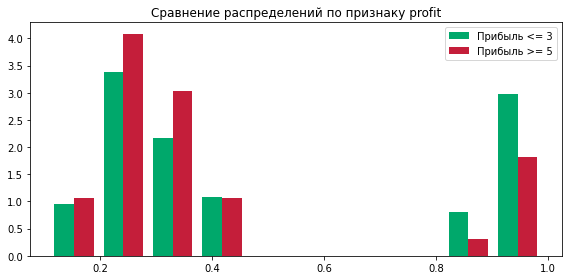

In [104]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist([segment_0_min['promo_purchases_6_month'], segment_0_max['promo_purchases_6_month']], density=True, 
        histtype='bar', color=colors, label=['Прибыль <= 3', 'Прибыль >= 5'])
ax.legend(prop={'size': 10})
ax.set_title(f'Сравнение распределений по признаку {column}')

fig.tight_layout()
plt.show()

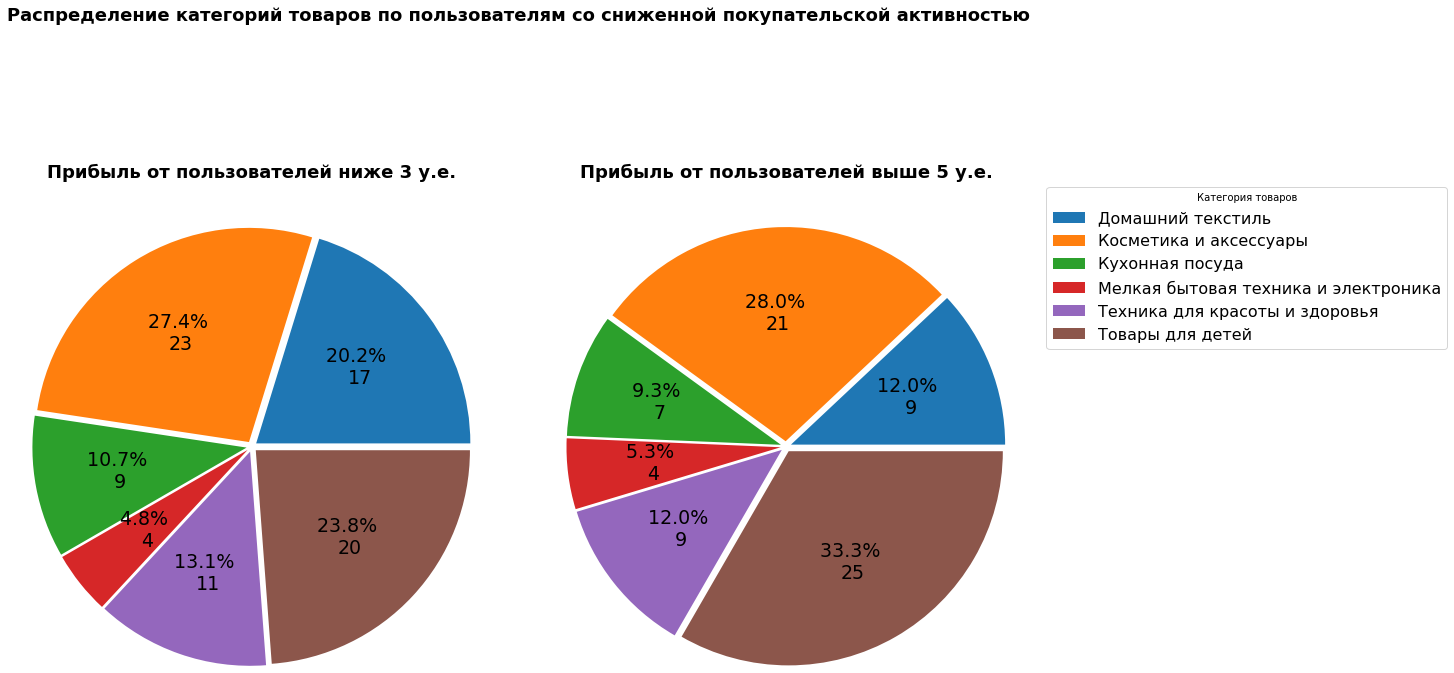

In [207]:
table = [segment_0_min['pop_category_6_month'].value_counts().sort_index(), 
         segment_0_max['pop_category_6_month'].value_counts().sort_index()]

fig, ax = plt.subplots(1, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Распределение категорий товаров по пользователям со сниженной покупательской активностью', size=18, weight='bold')

for i in range(2):
    wedges, texts, autotexts = ax[i].pie(table[i], autopct=lambda pct: percent(pct, table[i]), 
                                         radius=2, explode=[0.05 for i in range(len(table[i].index))])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    plt.tight_layout()
    
    if i == 0:
        ax[i].set_title('Прибыль от пользователей ниже 3 у.е.', y=1.5, pad=1, fontsize=18, weight='bold')
    else:
        ax[i].set_title('Прибыль от пользователей выше 5 у.е.', y=1.5, pad=1, fontsize=18, weight='bold')
        
plt.legend(wedges, table[0].index, fontsize=16, title='Категория товаров', bbox_to_anchor=(3, 0.5, 0, 1))

plt.show()

In [208]:
categories = pd.DataFrame(segment_0_min['pop_category_6_month'].value_counts().sort_index())
categories['prof'] = segment_0_max['pop_category_6_month'].value_counts().sort_index()
categories.columns = ['not_prof', 'prof']
categories['not_prof_perc'] = round((categories['not_prof'] / categories['not_prof'].sum()) * 100, 2)
categories['prof_perc'] = round((categories['prof'] / categories['prof'].sum()) * 100, 2)
categories['delta'] = categories['not_prof_perc'] - categories['prof_perc']
display(categories)

,not_prof,prof,not_prof_perc,prof_perc,delta
Домашний текстиль,17,9,20.24,12.00,8.24
Косметика и аксессуары,23,21,27.38,28.00,-0.62
Кухонная посуда,9,7,10.71,9.33,1.38
Мелкая бытовая техника и электроника,4,4,4.76,5.33,-0.57
Техника для красоты и здоровья,11,9,13.10,12.00,1.10
Товары для детей,20,25,23.81,33.33,-9.52


**Выводы по графикам**:
- У прибыльных пользователей со сниженной покупательской активностью топ категория является "Товары для детей";
- **Для увеличения покупательской активности данного сегмента необходимо ввести персонализированные акции на категорию товаров "Товары для детей"**.

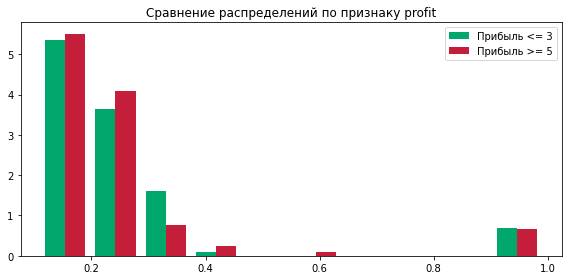

In [105]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.hist([segment_1_min['promo_purchases_6_month'], segment_1_max['promo_purchases_6_month']], density=True, 
        histtype='bar', color=colors, label=['Прибыль <= 3', 'Прибыль >= 5'])
ax.legend(prop={'size': 10})
ax.set_title(f'Сравнение распределений по признаку {column}')

fig.tight_layout()
plt.show()

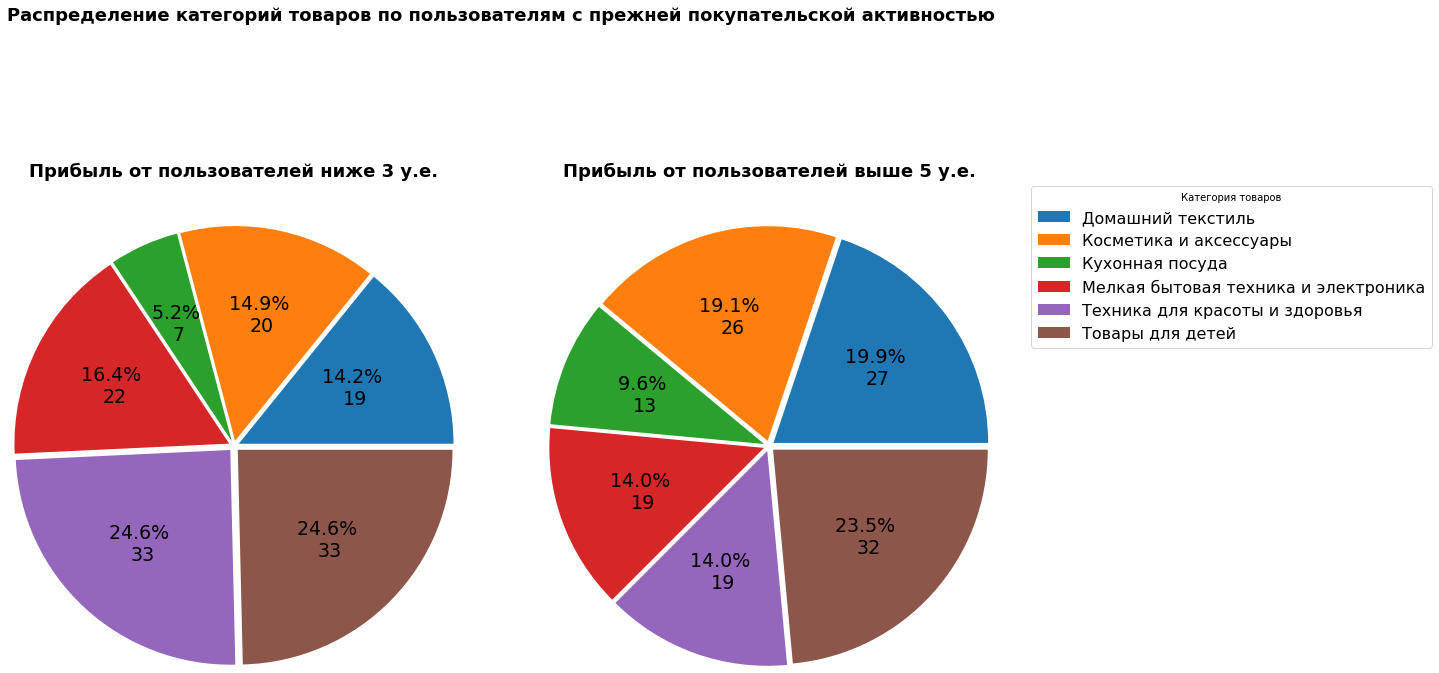

In [209]:
table = [segment_1_min['pop_category_6_month'].value_counts().sort_index(), 
         segment_1_max['pop_category_6_month'].value_counts().sort_index()]

fig, ax = plt.subplots(1, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Распределение категорий товаров по пользователям с прежней покупательской активностью', size=18, weight='bold')

for i in range(2):
    wedges, texts, autotexts = ax[i].pie(table[i], autopct=lambda pct: percent(pct, table[i]), 
                                         radius=2, explode=[0.05 for i in range(len(table[i].index))])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    plt.tight_layout()
    
    if i == 0:
        ax[i].set_title('Прибыль от пользователей ниже 3 у.е.', y=1.5, pad=1, fontsize=18, weight='bold')
    else:
        ax[i].set_title('Прибыль от пользователей выше 5 у.е.', y=1.5, pad=1, fontsize=18, weight='bold')
        
plt.legend(wedges, table[0].index, fontsize=16, title='Категория товаров', bbox_to_anchor=(3, 0.5, 0, 1))

plt.show()

In [210]:
categories = pd.DataFrame(segment_1_min['pop_category_6_month'].value_counts().sort_index())
categories['prof'] = segment_1_max['pop_category_6_month'].value_counts().sort_index()
categories.columns = ['not_prof', 'prof']
categories['not_prof_perc'] = round((categories['not_prof'] / categories['not_prof'].sum()) * 100, 2)
categories['prof_perc'] = round((categories['prof'] / categories['prof'].sum()) * 100, 2)
categories['delta'] = categories['not_prof_perc'] - categories['prof_perc']
display(categories)

,not_prof,prof,not_prof_perc,prof_perc,delta
Домашний текстиль,19,27,14.18,19.85,-5.67
Косметика и аксессуары,20,26,14.93,19.12,-4.19
Кухонная посуда,7,13,5.22,9.56,-4.34
Мелкая бытовая техника и электроника,22,19,16.42,13.97,2.45
Техника для красоты и здоровья,33,19,24.63,13.97,10.66
Товары для детей,33,32,24.63,23.53,1.10


**Выводы по графикам**:
- У прибыльных пользователей с прежней покупательской активностью непопулярной является категория "Техника для красоты и здоровья";
- **Для увеличения прибыли по данному сегменту необходимо пересмотреть персонализированные акции на категорию товаров "Техника для красоты и здоровья"**.

**Выводы по второму этапу**:
- Для увеличения покупательской активности покупателей со сниженной активностью необходимо ввести персонализированные акции на категорию товаров "Товары для детей";
- Для увеличения прибыли по пользователям с прежней активностью необходимо пересмотреть персонализированные акции на категорию товаров "Техника для красоты и здоровья".

**Третий этап**: разделям пользователей со сниженной покупательской активностью по акционным покупкам.

In [108]:
segment_0_profit_min = segment_0_min.query('promo_purchases_6_month > 0.6')
segment_0_profit_max = segment_0_max.query('promo_purchases_6_month > 0.6')

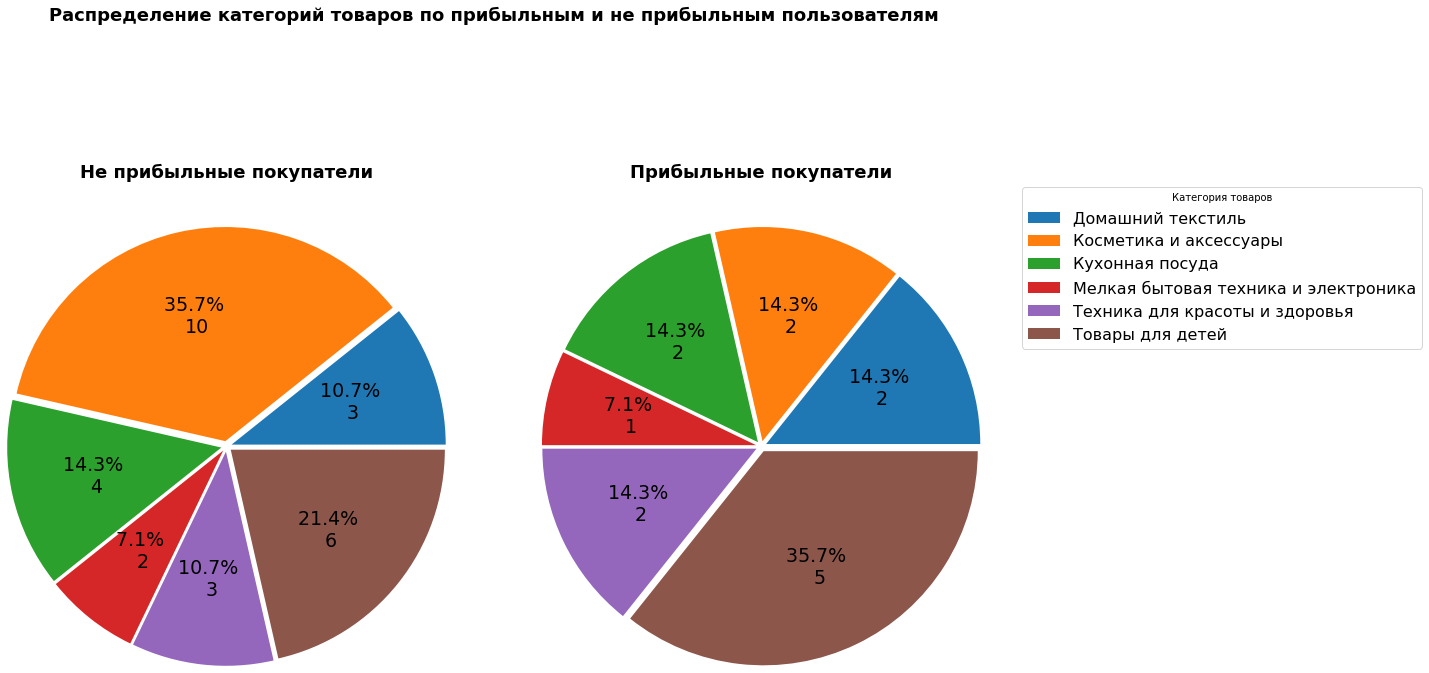

In [186]:
table = [segment_0_profit_min['pop_category_6_month'].value_counts().sort_index(), 
         segment_0_profit_max['pop_category_6_month'].value_counts().sort_index()]

fig, ax = plt.subplots(1, 2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Распределение категорий товаров по прибыльным и не прибыльным пользователям', size=18, weight='bold')

for i in range(2):
    wedges, texts, autotexts = ax[i].pie(table[i], autopct=lambda pct: percent(pct, table[i]), 
                                         radius=2, explode=[0.05 for i in range(len(table[i].index))])
    plt.setp(autotexts, size=19)
    plt.setp(texts, size=19)
    plt.tight_layout()
    
    if i == 0:
        ax[i].set_title('Не прибыльные покупатели', y=1.5, pad=1, fontsize=18, weight='bold')
    else:
        ax[i].set_title('Прибыльные покупатели', y=1.5, pad=1, fontsize=18, weight='bold')
        
plt.legend(wedges, table[0].index, fontsize=16, title='Категория товаров', bbox_to_anchor=(3, 0.5, 0, 1))

plt.show()

In [211]:
categories = pd.DataFrame(segment_0_profit_min['pop_category_6_month'].value_counts().sort_index())
categories['prof'] = segment_0_profit_max['pop_category_6_month'].value_counts().sort_index()
categories.columns = ['not_prof', 'prof']
categories['not_prof_perc'] = round((categories['not_prof'] / categories['not_prof'].sum()) * 100, 2)
categories['prof_perc'] = round((categories['prof'] / categories['prof'].sum()) * 100, 2)
categories['delta'] = categories['not_prof_perc'] - categories['prof_perc']
display(categories)

,not_prof,prof,not_prof_perc,prof_perc,delta
Домашний текстиль,3,2,10.71,14.29,-3.58
Косметика и аксессуары,10,2,35.71,14.29,21.42
Кухонная посуда,4,2,14.29,14.29,0.00
Мелкая бытовая техника и электроника,2,1,7.14,7.14,0.00
Техника для красоты и здоровья,3,2,10.71,14.29,-3.58
Товары для детей,6,5,21.43,35.71,-14.28


**Вывод по третьему этапу**:
- По пользователям со сниженной покупательской активностью и маленькой прибыльностью стоит пересмотреть маркентинговые предложения по категории товаров "Косметика и аксессуары";
- По пользователям со сниженной покупательской активностью и большой прибыльностью стоит пересмотреть маркентинговые предложения по категории товаров "Товары для детей".

### Рекомендации по увеличению покупательской активности

1. Для **увеличения покупательской активности** пользователей необходимо ввести персонализированные акции на категорию товаров **"Мелкая бытовая техника и электроника" и "Техника для красоты и здоровья"**, так как **у активных пользователей** именно эта **категория популярна**;
2. Для **увеличения покупательской активности покупателей со сниженной активностью** необходимо ввести персонализированные акции на категорию товаров **"Товары для детей"**;
3. Для **увеличения прибыли по пользователям с прежней активностью** необходимо **пересмотреть** персонализированные акции на категорию товаров **"Техника для красоты и здоровья"**.
4. По пользователям со **сниженной покупательской активностью и маленькой прибыльностью** стоит пересмотреть маркентинговые предложения по категории товаров **"Косметика и аксессуары"**;
5. По пользователям со **сниженной покупательской активностью и большой прибыльностью** стоит пересмотреть маркентинговые предложения по категории товаров **"Товары для детей"**.

## Общий вывод

**Цель и задачи проекта:**
- **Цель** - сформировать рекомендации по увеличению покупательской активности пользователей.
- **Задачи:**
1. Провести загрузку данных и знакомство с ними;
2. Провести предобработку данных;
- Обработать дубликаты и пропуски;
- Привести наименования столбцов к стандартному виду.
3. Провести исследовательских анализ данных (описание и визуализацию);
- Рассмотреть распределение количественных и качественных признаков полученных датафреймов.
4. Провести корреляционный анализ (количественных и качественных признаков);
- Определить корреляцию между количественными и качественными признаками;
- Построить графики рассеивания по различным признакам;
- Построить графики "ящик с усами" по различным признакам.
5. Провести выбор и обучение модели с дальнейшим прогнозированием покупательской активности;
- Подготовить пайплайн для обучения модели;
- Провести подбор гиперпараметров c помощью специальных функций;
- Определить лучшую модель по выбранной метрики качества.
6. Провести анализ важности признаков моделирования по выбранной модели;
- Оцените важность признаков для выбранной модели;
- Построить график важности с помощью метода SHAP.
7. Провести сегментацию пользователей в зависимости от целевого признака и результатов моделирования;
8. Сформировать рекомендации по увеличению покупательской активности по выделенным сегментам.

Описание исходных данных и проведенной предобработки:
- Исходные данные состоят из четырех датасетов размерами **1300х13**, **3900х3**, **2600х3** и **1300х2**;
- Общее количество уникальных пользователей равно **1300**;
- В процессе предобработки данных был проведен первичный анализ данных, по результатом которых были исключены неявные дубликаты в нужных столбцах;
- Во всех датафреймах отсутствуют пропуски;
- В процессе предобработки были отобраны **1297** пользователей с наличие необходимой для моделирования информации.

Описание регламента поиска лучше модели:
- Построен пайплайн с двумя кодировщиками категориальных признаков (`OneHotEncoder` и `OrdinalEncoder`), одним стандартизатором количественных признаков (`StandardScaler`) и базовой моделью (`DesicionTreeClassifier`);
- Проведен поиск гиперпараметров с помощью выбранной функции (`RandomizedSearchCV`). Гиперпараметры были заданы для 4 моделей машинного обучения (`DesicionTreeClassifier`, `LogisticRegression`, `KNeighborsClassifier`,  `SVC`) и двух стандартизаторов количественных признаков (`StandardScaler`, `RobustScaler`);
- Оценка модели проводилась с помощью метрики качества `ROC-AUC`.

В процессе поиска была определена лучшая модель со следующими параметрами:
- Кодировщики категориальных признаков: `OneHotEncoder` и `OrdinalEncoder`;
- Стндартизатор количественных признаков `StandardScaler`;
- Модель машинного обучения: `SVC`;
- Ядро модели SVC: `'poly'`

Предложения по увеличения покупательской активности выбранного сегмента покупателей:
1. Для **увеличения покупательской активности** пользователей необходимо ввести персонализированные акции на категорию товаров **"Мелкая бытовая техника и электроника" и "Техника для красоты и здоровья"**, так как **у активных пользователей** именно эта **категория популярна**;
2. Для **увеличения покупательской активности покупателей со сниженной активностью** необходимо ввести персонализированные акции на категорию товаров **"Товары для детей"**;
3. Для **увеличения прибыли по пользователям с прежней активностью** необходимо **пересмотреть** персонализированные акции на категорию товаров **"Техника для красоты и здоровья"**.
4. По пользователям со **сниженной покупательской активностью и маленькой прибыльностью** стоит пересмотреть маркентинговые предложения по категории товаров **"Косметика и аксессуары"**;
5. По пользователям со **сниженной покупательской активностью и большой прибыльностью** стоит пересмотреть маркентинговые предложения по категории товаров **"Товары для детей"**.